 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, i.e. the velocity of the molecules is different for different gas temperatures. **This distribution is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the *Chi distribution* with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 

Below I have created 3 distributions. Based on the description above


# 1) label the axis in the plot, 

Text(0, 0.5, 'frequency')

/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


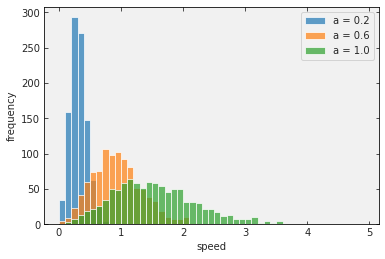

In [2]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
  ax.hist(sp.stats.maxwell.rvs(scale=a, size=1000), 
          bins=np.arange(0,5,0.1), alpha=0.7, label="a = %.1f"%a);
  
pl.legend();

# your code here
pl.xlabel("speed")
pl.ylabel("frequency")

# 2) knowing that the *scale* parameter *a* is a function of the temperature  *T* , and that the dependency is to a power 1/2, which is correct: 

   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 
 

**$a \propto \sqrt{T}$** is correct.


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

*Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. How does it compare to the most probable molecular speed.**

In [144]:
# your code here
def mu_chi(k):
    # mean of chi distribution
    return np.sqrt(2) * sp.special.gamma((k + 1) / 2) / sp.special.gamma(k/2)

def mu_MB(a, mu_chi):
    # mean of maxwell distribution
    return a*mu_chi

a = np.array([0.2, 0.6, 1.0])
mu_MB(a, mu_chi(3))

array([0.31915382, 0.95746147, 1.59576912])

The mean of three distributions are close to the most probable molecular speed. 

This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [3]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


In [9]:
def simulate(Nparticle=100, Nframe=100):
    dt = 0.1
    v0mu = 10
    v0sigma = 5
    radius = 0.5
    
    X = np.zeros((Nframe, Nparticle))
    Y = np.zeros((Nframe, Nparticle))
    Vx = np.zeros((Nframe, Nparticle))
    Vy = np.zeros((Nframe, Nparticle))
    
    # initial position and velocity
    X[0, :] = np.random.rand(Nparticle) * 100
    Y[0, :] = np.random.rand(Nparticle) * 100
    
    V0 = v0sigma * np.random.randn(Nparticle) + v0mu
    # choose a random direction
    theta = np.random.uniform(high=2*np.pi, low=0, size=Nparticle)  
    Vx[0, :] = V0 * np.cos(theta)
    Vy[0, :] = V0 * np.sin(theta)
    
    # update for each time step
    for fi in range(1, Nframe):
        # update position
        X[fi, :] = X[fi-1, :] + Vx[fi-1,:] * dt
        Y[fi, :] = Y[fi-1, :] + Vy[fi-1,:] * dt
                            
        # check boundary
        Xwall = ((X[fi,:] - 0) <= radius) | ((100 - X[fi,:]) <= radius)
        Ywall = ((Y[fi,:] - 0) <= radius) | ((100 - Y[fi,:]) <= radius)

        Vx[fi, Xwall] = -Vx[fi-1,Xwall]
        Vx[fi, np.invert(Xwall)] = Vx[fi-1, np.invert(Xwall)]

        Vy[fi,Ywall] = -Vy[fi-1, Ywall] 
        Vy[fi,np.invert(Ywall)] = Vy[fi-1, np.invert(Ywall)]

        # check collision pairs
        for ith in range(0, Nparticle):
            for jth in range(ith+1, Nparticle):
                dist = np.sqrt((X[fi, ith] - X[fi, jth])**2 + (Y[fi, ith] - Y[fi, jth])**2)
                if dist <= radius*2:
                    # update velicities
                    Xith = np.array([X[fi, ith], Y[fi, ith]])
                    Xjth = np.array([X[fi, jth], Y[fi, jth]])
                    Vith = np.array([Vx[fi, ith], Vy[fi, ith]])
                    Vjth = np.array([Vx[fi, jth], Vy[fi, jth]])
                    # use the elastic collision formula 
                    Vith = Vith - np.dot(Vith-Vjth, Xith-Xjth) * (Xith - Xjth) / dist**2
                    Vjth = Vjth - np.dot(Vjth-Vith, Xjth-Xith) * (Xjth - Xith) / dist**2
                    # save to Vx and Vy 
                    Vx[fi, ith] = Vith[0]
                    Vy[fi, ith] = Vith[1]
                    Vx[fi, jth] = Vjth[0]
                    Vy[fi, jth] = Vjth[1]
        
    return X, Y, Vx, Vy

# run the system, save positions and velocities for each frame
X, Y, Vx, Vy = simulate(Nparticle=200, Nframe=200)

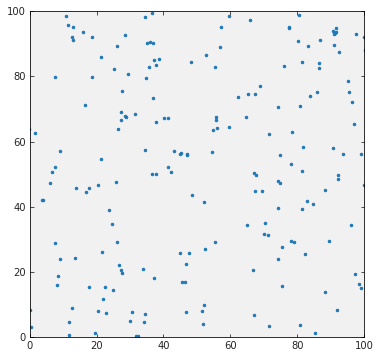

In [10]:
# create an animation
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlim=(0, 100), ylim=(0, 100))
scat, = ax.plot([], [], '.', markersize=5)

# initialization function: plot the background of each frame
def init():
    # np.random.seed(1)
    scat.set_data(X[0,:], Y[0,:])
    return scat,

def animate(i):
    
    scat.set_data(X[i,:], Y[i,:])
    
    return scat,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=100, blit=True)

# save the anim to mp4
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_jshtml())

Text(0.5, 1.0, 'final')

/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


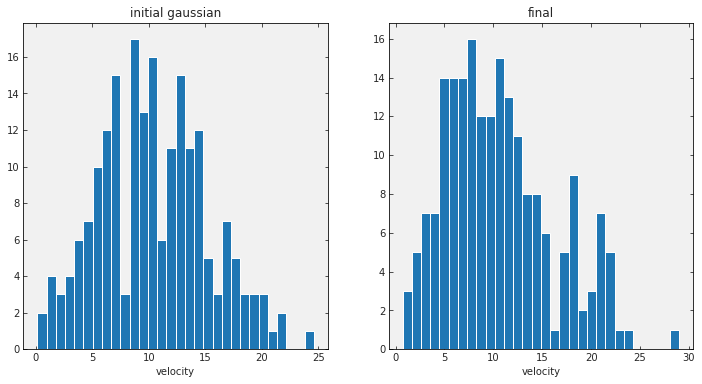

In [12]:
# plot the initial and final velocity distribution
V = np.sqrt(Vx**2 + Vy**2)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(V[1, :], bins=30)
plt.xlabel("velocity")
plt.title("initial gaussian")
plt.subplot(122)
plt.hist(V[198, :], bins=30)
plt.xlabel("velocity")
plt.title("final")

The velocity distribution shifts to Maxwell distridution from initial Gaussian distribution. 